In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

#leyendo datos

df = pd.read_json('https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json')
from pandas import json_normalize
df2 = json_normalize(df)

In [2]:
customer_norm= json_normalize(df['customer'])
phone_norm= json_normalize(df['phone'])
internet_norm= json_normalize(df['internet'])
account_norm= json_normalize(df['account'])

df_norm= pd.concat([customer_norm,phone_norm,internet_norm,account_norm,df], axis=1)
df_norm=df_norm.drop(columns={'customer', 'phone','internet','account'})
df_norm

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,customerID,Churn
0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,...,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3,0002-ORFBO,No
1,Male,0,No,No,9,Yes,Yes,DSL,No,No,...,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4,0003-MKNFE,No
2,Male,0,No,No,4,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,0004-TLHLJ,Yes
3,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,0011-IGKFF,Yes
4,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4,0013-EXCHZ,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,Female,0,No,No,13,Yes,No,DSL,Yes,No,...,Yes,No,No,One year,No,Mailed check,55.15,742.9,9987-LUTYD,No
7263,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,...,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7,9992-RRAMN,Yes
7264,Male,0,No,No,2,Yes,No,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,9992-UJOEL,No
7265,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,...,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,9993-LHIEB,No


In [3]:
df_norm.isna().sum()


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
customerID          0
Churn               0
dtype: int64

In [4]:
print(df_norm.duplicated().sum())

0


In [5]:
df_norm[df_norm['Churn'].str.strip() == '']


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,customerID,Churn
30,Female,0,No,No,11,Yes,Yes,Fiber optic,Yes,No,...,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3,0047-ZHDTW,
75,Male,0,No,No,71,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1,0120-YZLQA,
96,Male,0,No,No,29,Yes,No,DSL,Yes,Yes,...,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2,0154-QYHJU,
98,Female,1,No,No,5,Yes,No,DSL,Yes,Yes,...,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85,0162-RZGMZ,
175,Male,1,Yes,No,65,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45,0274-VVQOQ,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,Female,0,No,No,14,Yes,Yes,DSL,No,Yes,...,No,No,No,One year,Yes,Mailed check,54.25,773.2,9840-GSRFX,
7180,Female,0,Yes,No,49,No,No phone service,DSL,Yes,No,...,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75,9872-RZQQB,
7211,Male,0,No,No,9,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85,9920-GNDMB,
7239,Female,0,Yes,Yes,67,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9,9955-RVWSC,


In [6]:
df_norm[df_norm['Charges.Total']==' ']
df_norm['Charges.Total'] = df_norm['Charges.Total'].replace(' ', 0)
df_norm['Charges.Total']=df_norm['Charges.Total'].astype(float)

In [7]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7267 non-null   object 
 1   SeniorCitizen     7267 non-null   int64  
 2   Partner           7267 non-null   object 
 3   Dependents        7267 non-null   object 
 4   tenure            7267 non-null   int64  
 5   PhoneService      7267 non-null   object 
 6   MultipleLines     7267 non-null   object 
 7   InternetService   7267 non-null   object 
 8   OnlineSecurity    7267 non-null   object 
 9   OnlineBackup      7267 non-null   object 
 10  DeviceProtection  7267 non-null   object 
 11  TechSupport       7267 non-null   object 
 12  StreamingTV       7267 non-null   object 
 13  StreamingMovies   7267 non-null   object 
 14  Contract          7267 non-null   object 
 15  PaperlessBilling  7267 non-null   object 
 16  PaymentMethod     7267 non-null   object 


In [8]:
df_norm['Churn'].value_counts()

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

In [9]:
df_norm_limpio=df_norm[df_norm['Churn'].str.strip() != '']
df_norm_limpio


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,customerID,Churn
0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,...,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,0002-ORFBO,No
1,Male,0,No,No,9,Yes,Yes,DSL,No,No,...,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,0003-MKNFE,No
2,Male,0,No,No,4,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,0004-TLHLJ,Yes
3,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,0011-IGKFF,Yes
4,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,0013-EXCHZ,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,Female,0,No,No,13,Yes,No,DSL,Yes,No,...,Yes,No,No,One year,No,Mailed check,55.15,742.90,9987-LUTYD,No
7263,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,...,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,9992-RRAMN,Yes
7264,Male,0,No,No,2,Yes,No,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,9992-UJOEL,No
7265,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,...,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,9993-LHIEB,No


In [10]:
df_norm_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 
 17  

In [11]:
df_norm_limpio['Cuentas_Diarias']= df_norm_limpio['Charges.Monthly']/30
df_norm_limpio['Cuentas_Diarias']

C:\Users\Marcelo\AppData\Local\Temp\ipykernel_19188\3172031970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_norm_limpio['Cuentas_Diarias']= df_norm_limpio['Charges.Monthly']/30


0       2.186667
1       1.996667
2       2.463333
3       3.266667
4       2.796667
          ...   
7262    1.838333
7263    2.836667
7264    1.676667
7265    2.261667
7266    1.966667
Name: Cuentas_Diarias, Length: 7043, dtype: float64

In [12]:
df_norm_limpio.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,2.158723
std,0.368612,24.559481,30.090047,2266.794470,1.003002
min,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,9.000000,35.500000,398.550000,1.183333
50%,0.000000,29.000000,70.350000,1394.550000,2.345000
75%,0.000000,55.000000,89.850000,3786.600000,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.958333


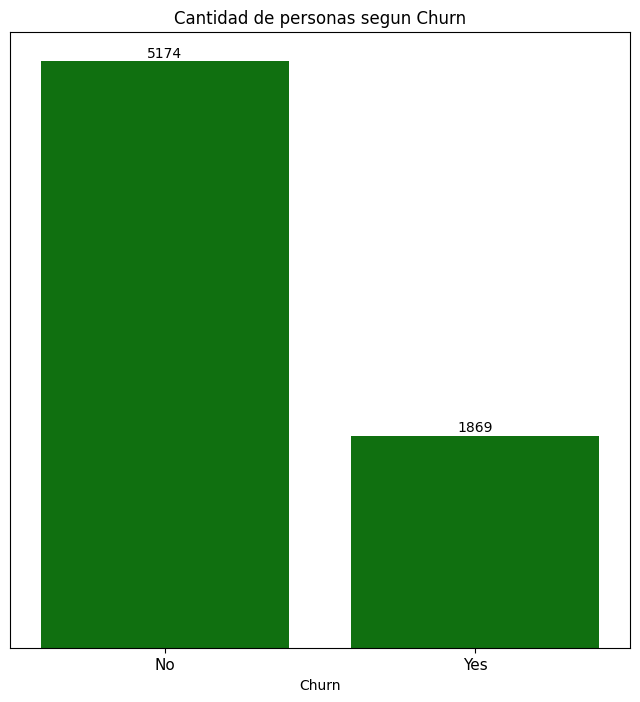

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,8))
ax=sns.countplot(x='Churn', data=df_norm_limpio, color="green",ax=ax)
ax.set_title("Cantidad de personas segun Churn")
ax.yaxis.set_visible(False)
ax.tick_params(axis='x', labelsize=11)
for p in ax.patches:
    height = p.get_height()  
    ax.text(p.get_x() + p.get_width()/2, height + 10, 
            f'{int(height)}', ha='center', va='bottom')
plt.savefig("churn.png")
plt.show()

In [14]:
df_norm_limpio.describe().columns

Index(['SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total',
       'Cuentas_Diarias'],
      dtype='object')

In [15]:
columnas_numericas = df_norm_limpio.describe().columns
columnas_no_numericas = df_norm_limpio.columns[~df_norm_limpio.columns.isin(columnas_numericas)]


In [16]:
columnas_no_numericas = list(columnas_no_numericas)
columnas_no_numericas.remove('Churn')
columnas_no_numericas.remove('customerID')
columnas_no_numericas.append('SeniorCitizen')



C:\Users\Marcelo\AppData\Local\Temp\ipykernel_19188\143386175.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.

  ax=sns.countplot(x=c, hue='Churn', data=df_norm_limpio, color="green",ax=ax)


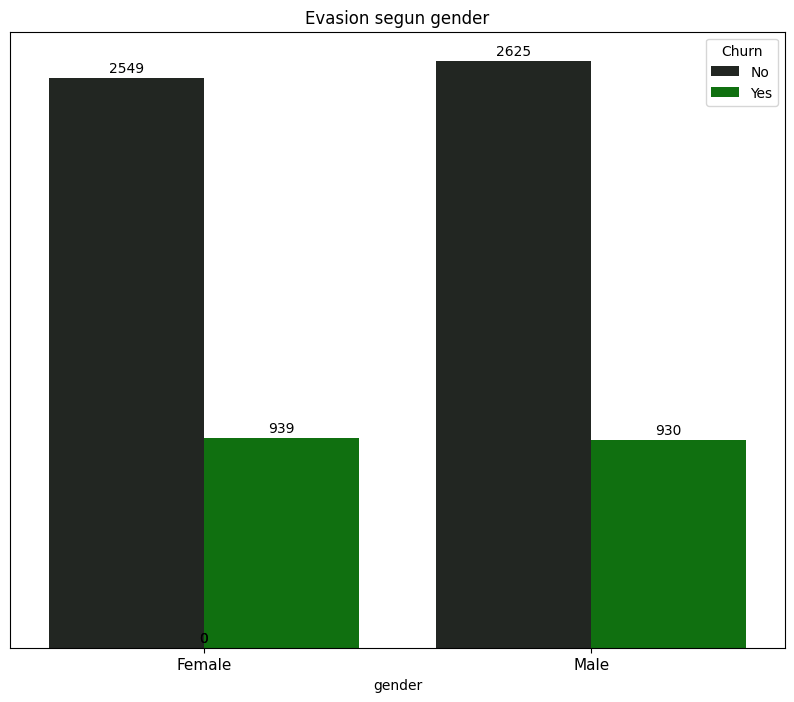

C:\Users\Marcelo\AppData\Local\Temp\ipykernel_19188\143386175.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.

  ax=sns.countplot(x=c, hue='Churn', data=df_norm_limpio, color="green",ax=ax)


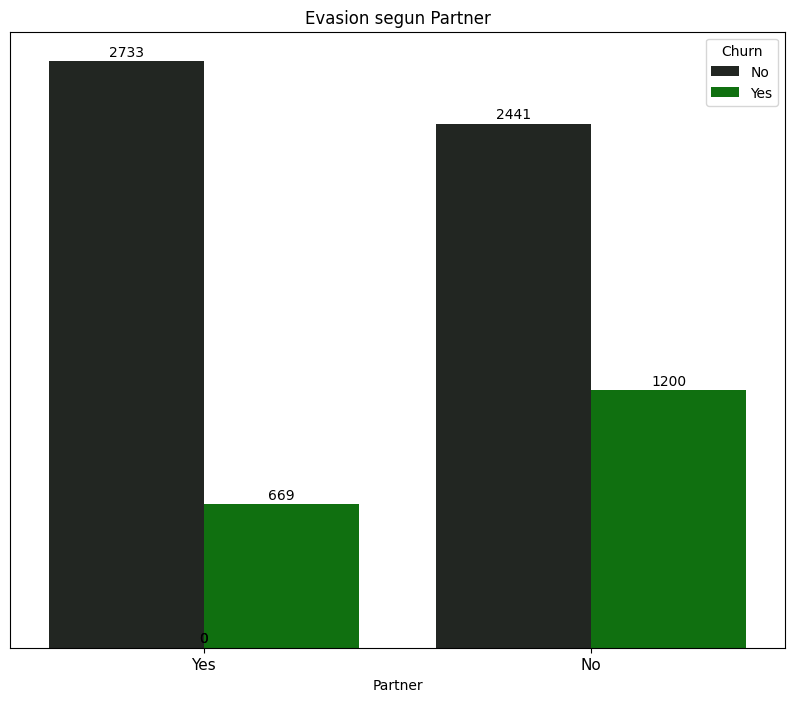

C:\Users\Marcelo\AppData\Local\Temp\ipykernel_19188\143386175.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.

  ax=sns.countplot(x=c, hue='Churn', data=df_norm_limpio, color="green",ax=ax)


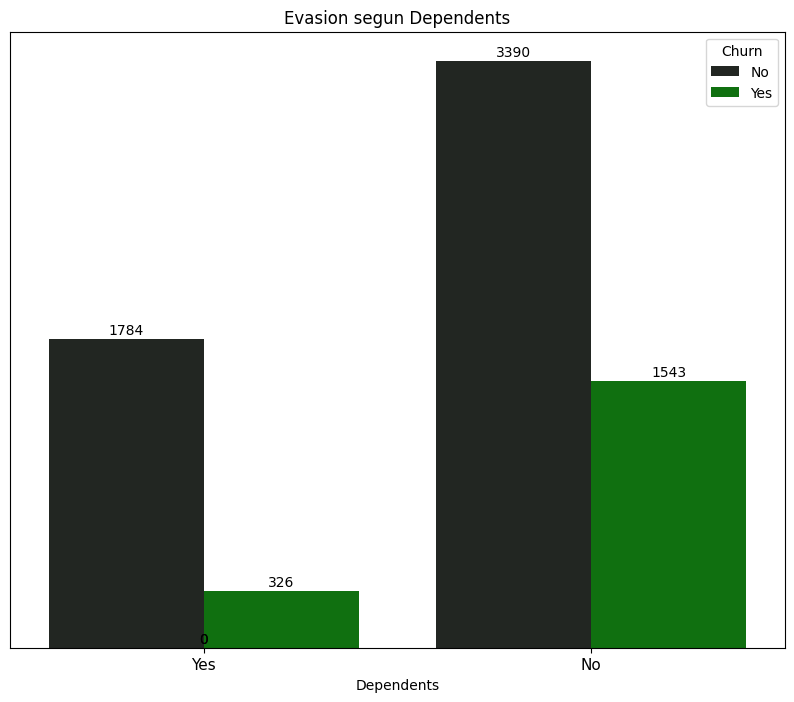

C:\Users\Marcelo\AppData\Local\Temp\ipykernel_19188\143386175.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.

  ax=sns.countplot(x=c, hue='Churn', data=df_norm_limpio, color="green",ax=ax)


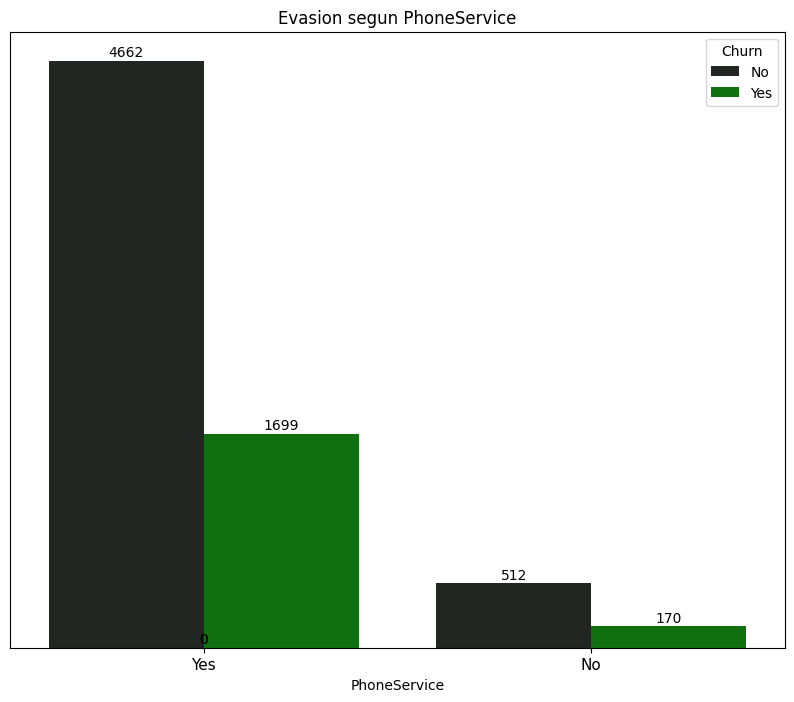

C:\Users\Marcelo\AppData\Local\Temp\ipykernel_19188\143386175.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.

  ax=sns.countplot(x=c, hue='Churn', data=df_norm_limpio, color="green",ax=ax)


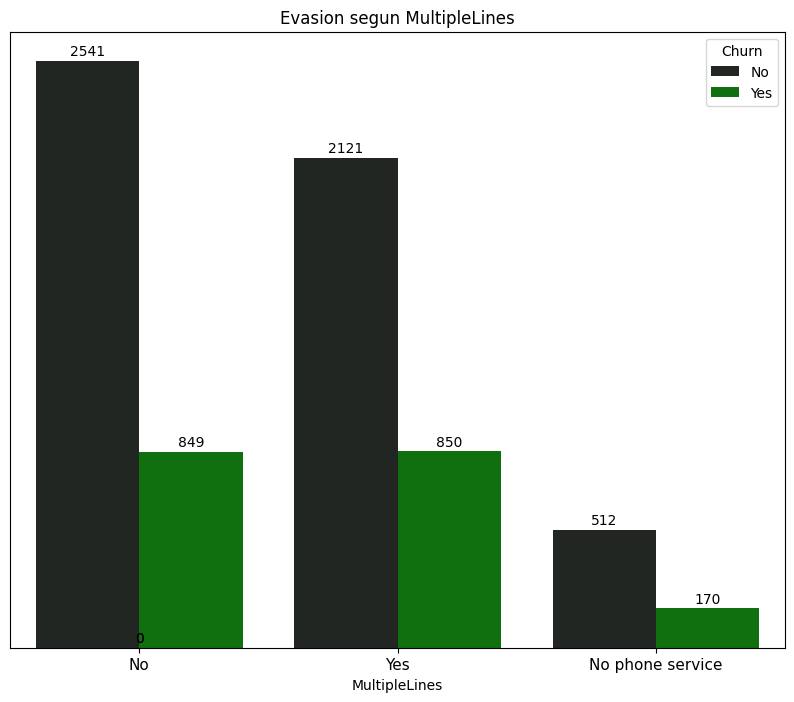

C:\Users\Marcelo\AppData\Local\Temp\ipykernel_19188\143386175.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.

  ax=sns.countplot(x=c, hue='Churn', data=df_norm_limpio, color="green",ax=ax)


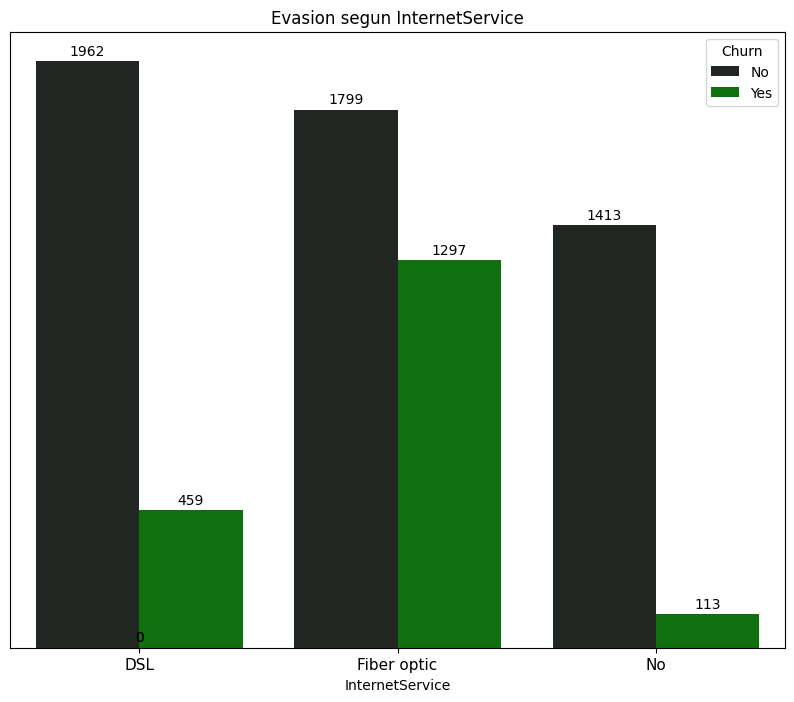

C:\Users\Marcelo\AppData\Local\Temp\ipykernel_19188\143386175.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.

  ax=sns.countplot(x=c, hue='Churn', data=df_norm_limpio, color="green",ax=ax)


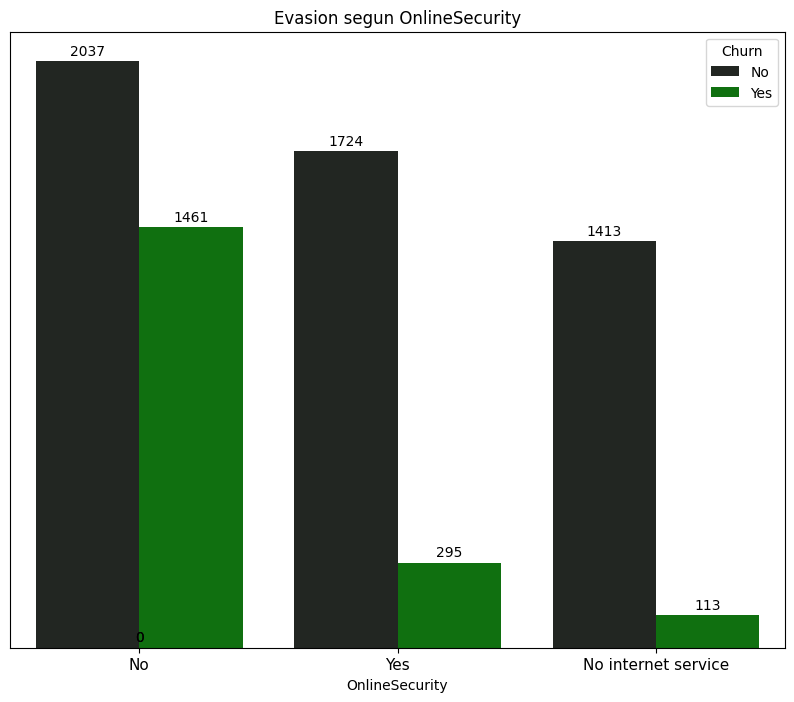

C:\Users\Marcelo\AppData\Local\Temp\ipykernel_19188\143386175.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.

  ax=sns.countplot(x=c, hue='Churn', data=df_norm_limpio, color="green",ax=ax)


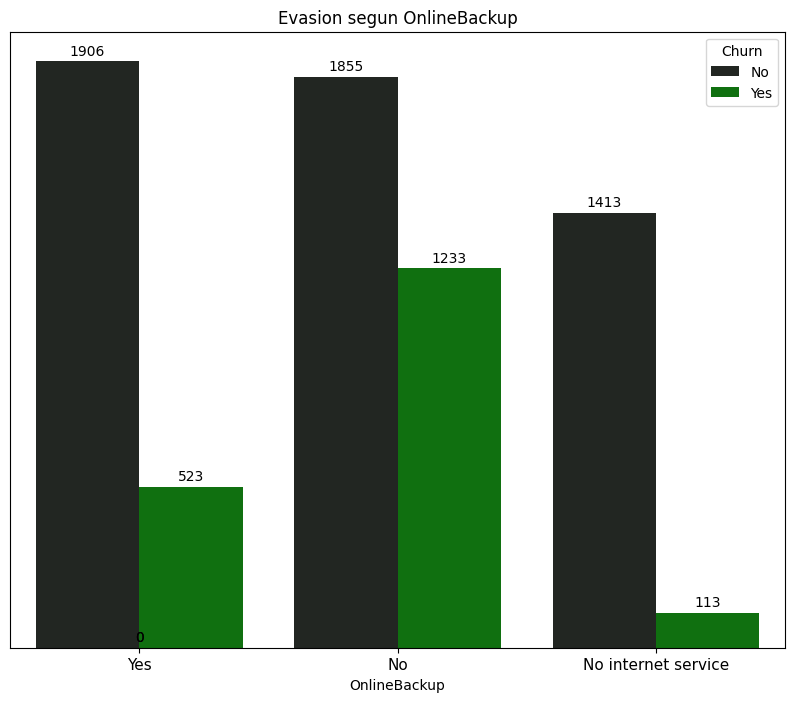

C:\Users\Marcelo\AppData\Local\Temp\ipykernel_19188\143386175.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.

  ax=sns.countplot(x=c, hue='Churn', data=df_norm_limpio, color="green",ax=ax)


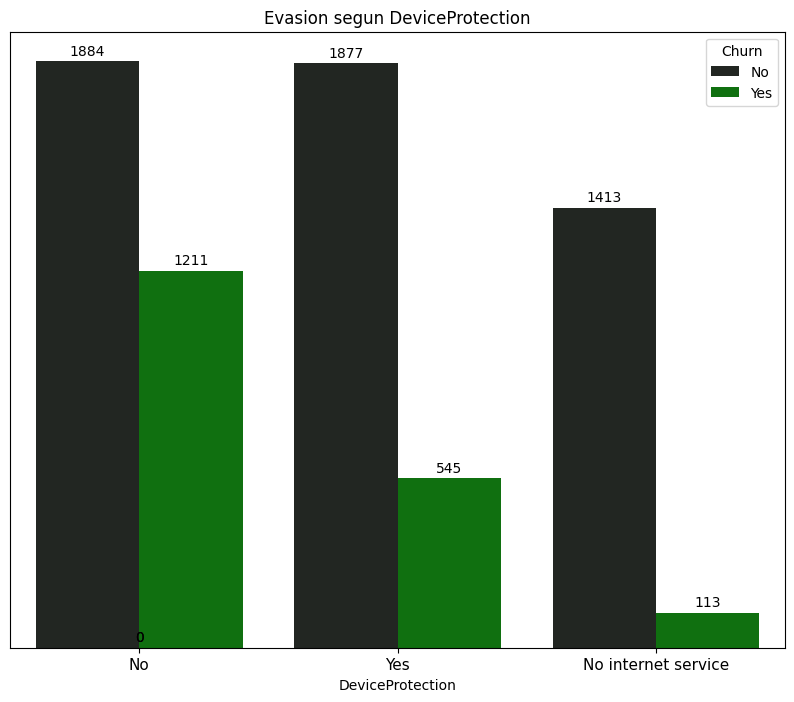

C:\Users\Marcelo\AppData\Local\Temp\ipykernel_19188\143386175.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.

  ax=sns.countplot(x=c, hue='Churn', data=df_norm_limpio, color="green",ax=ax)


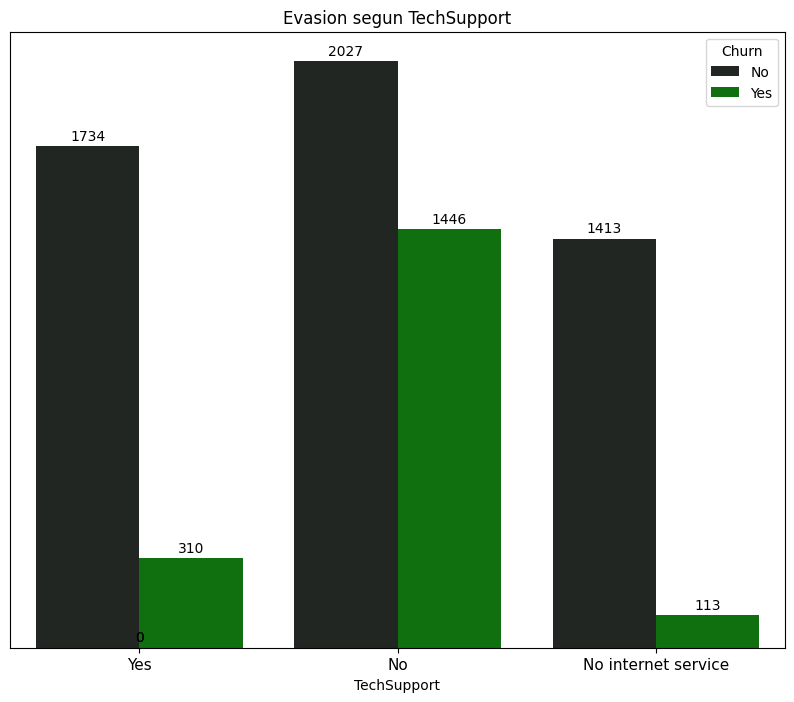

C:\Users\Marcelo\AppData\Local\Temp\ipykernel_19188\143386175.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.

  ax=sns.countplot(x=c, hue='Churn', data=df_norm_limpio, color="green",ax=ax)


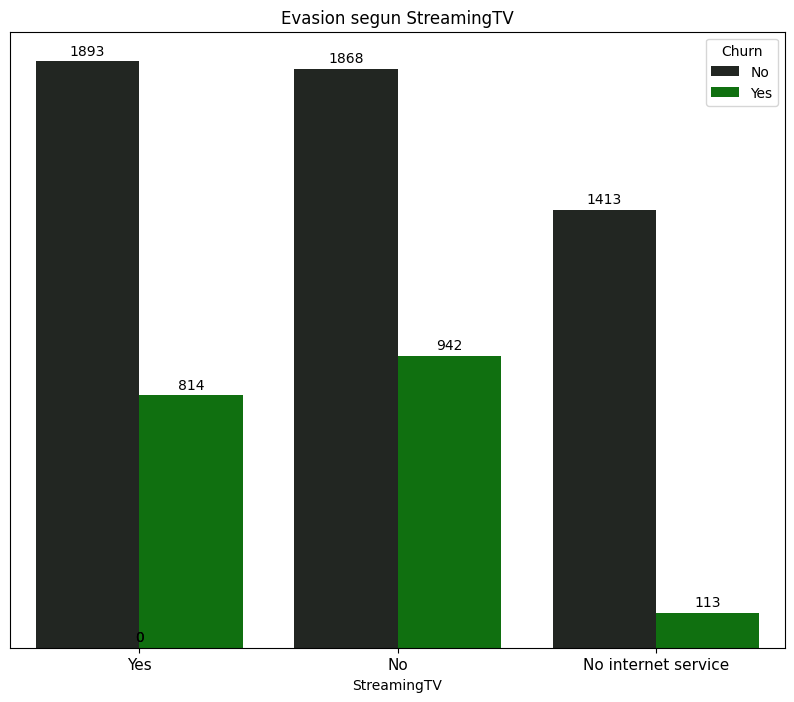

C:\Users\Marcelo\AppData\Local\Temp\ipykernel_19188\143386175.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.

  ax=sns.countplot(x=c, hue='Churn', data=df_norm_limpio, color="green",ax=ax)


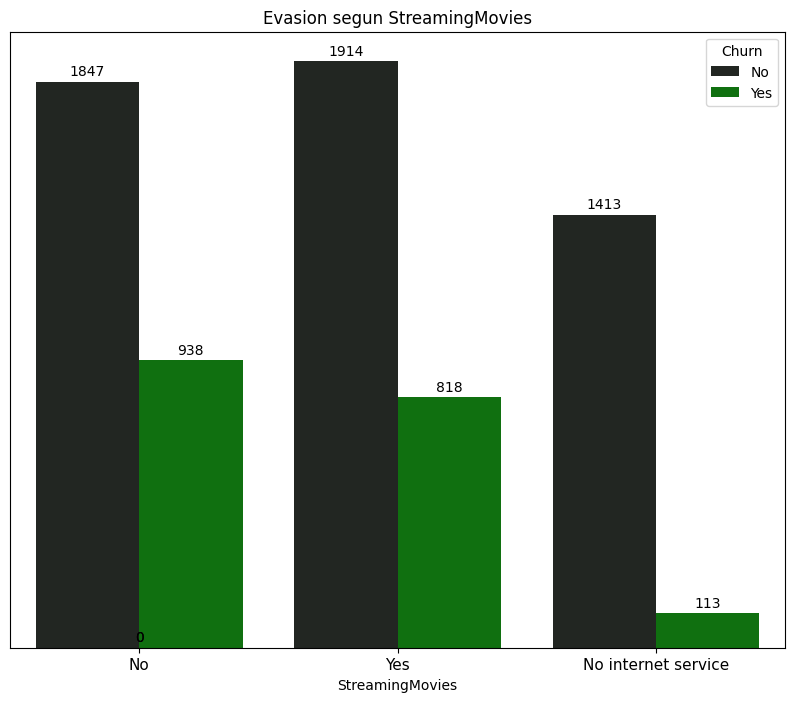

C:\Users\Marcelo\AppData\Local\Temp\ipykernel_19188\143386175.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.

  ax=sns.countplot(x=c, hue='Churn', data=df_norm_limpio, color="green",ax=ax)


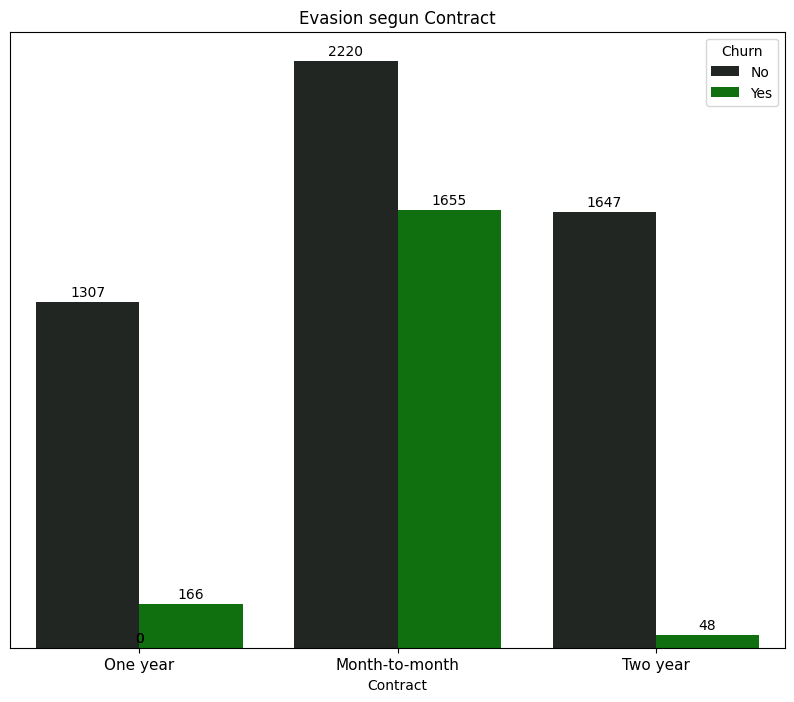

C:\Users\Marcelo\AppData\Local\Temp\ipykernel_19188\143386175.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.

  ax=sns.countplot(x=c, hue='Churn', data=df_norm_limpio, color="green",ax=ax)


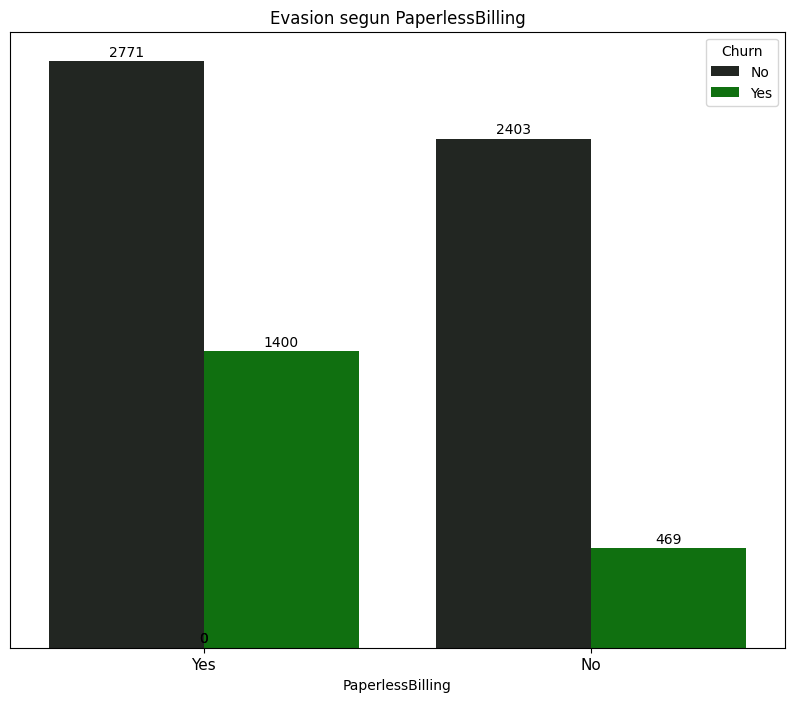

C:\Users\Marcelo\AppData\Local\Temp\ipykernel_19188\143386175.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.

  ax=sns.countplot(x=c, hue='Churn', data=df_norm_limpio, color="green",ax=ax)


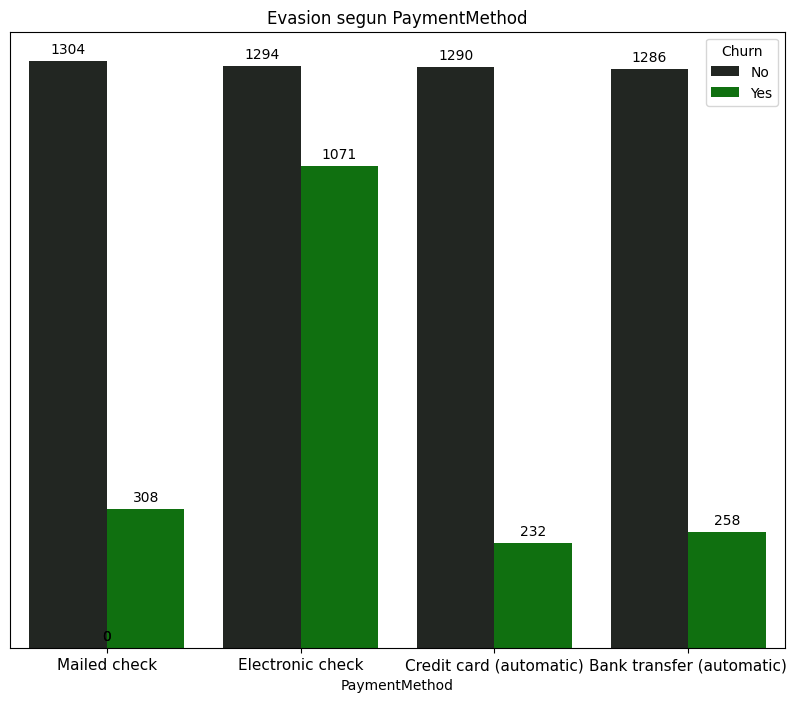

C:\Users\Marcelo\AppData\Local\Temp\ipykernel_19188\143386175.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:green'` for the same effect.

  ax=sns.countplot(x=c, hue='Churn', data=df_norm_limpio, color="green",ax=ax)


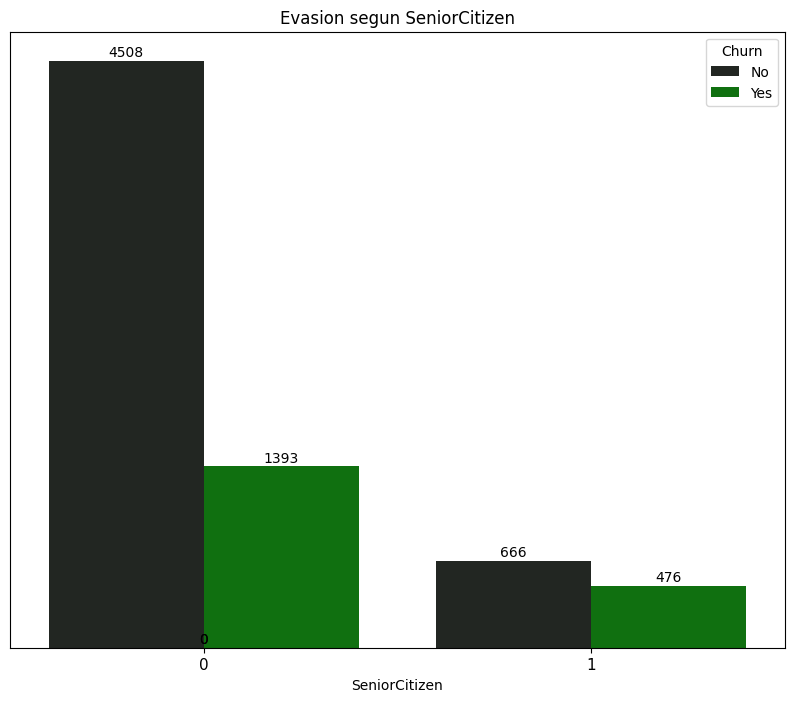

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
for c in columnas_no_numericas:
    fig, ax = plt.subplots(figsize=(10,8))
    ax=sns.countplot(x=c, hue='Churn', data=df_norm_limpio, color="green",ax=ax)
    ax.set_title(f"Evasion segun {c}")
    ax.yaxis.set_visible(False)
    ax.tick_params(axis='x', labelsize=11)
    for p in ax.patches:
        height = p.get_height()  
        ax.text(p.get_x() + p.get_width()/2, height + 10, 
                f'{int(height)}', ha='center', va='bottom')
    plt.savefig(f"{c}.png")  # Guarda el gráfico como imagen
    plt.show()

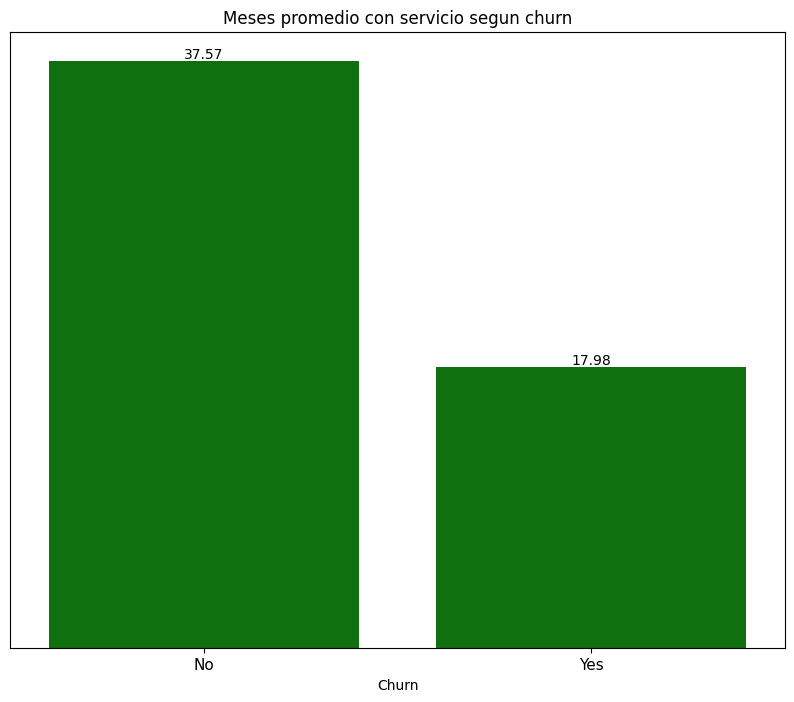

In [18]:
df_tenure = df_norm_limpio.groupby('Churn')['tenure'].mean().reset_index()
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,8))
ax=sns.barplot(x='Churn',y='tenure', data=df_tenure, color="green",ax=ax)
ax.set_title(f"Meses promedio con servicio segun churn")
ax.yaxis.set_visible(False)
ax.tick_params(axis='x', labelsize=11)
for p in ax.patches:
    height = p.get_height()  
    ax.text(p.get_x() + p.get_width()/2, height, 
    f'{height:.2f}', ha='center', va='bottom')
plt.show()

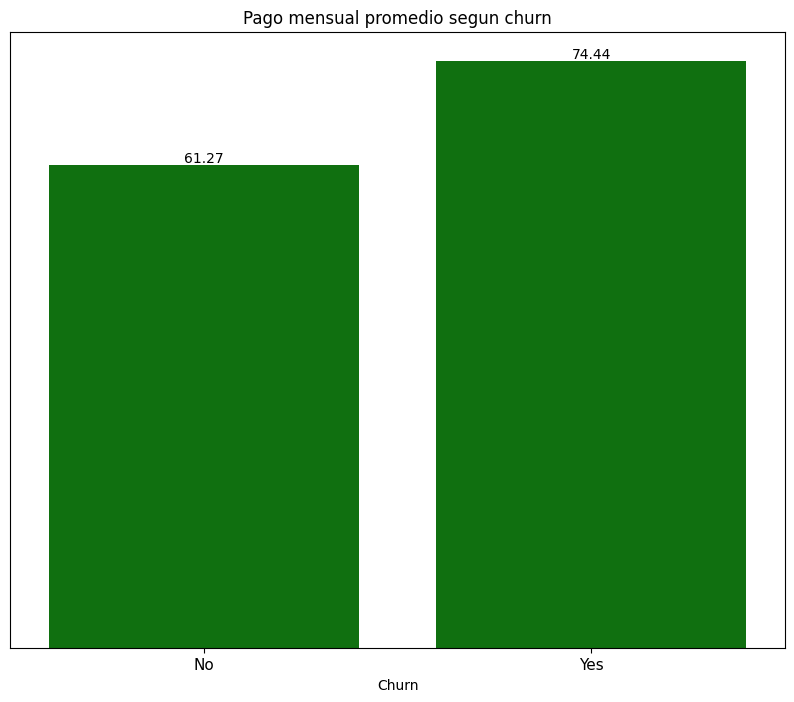

In [29]:
df_mensual = df_norm_limpio.groupby('Churn')['Charges.Monthly'].mean().reset_index()
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,8))
ax=sns.barplot(x='Churn',y='Charges.Monthly', data=df_mensual, color="green",ax=ax)
ax.set_title("Pago mensual promedio segun churn")
ax.yaxis.set_visible(False)
ax.tick_params(axis='x', labelsize=11)
for p in ax.patches:
    height = p.get_height()  
    ax.text(p.get_x() + p.get_width()/2, height, 
    f'{height:.2f}', ha='center', va='bottom')
plt.savefig("pagomensual.png")  # Guarda el gráfico como imagen
plt.show()

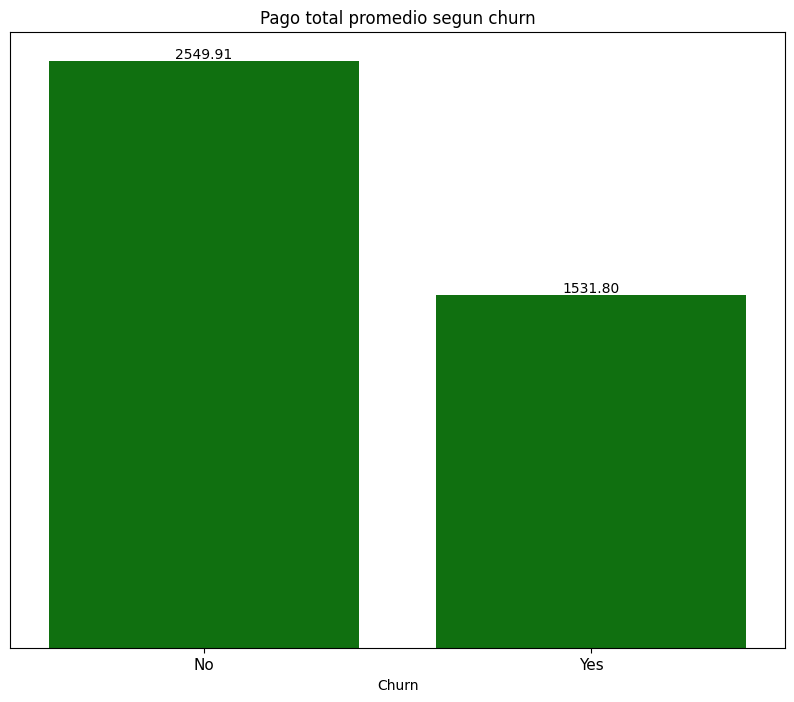

In [28]:
df_pagototal = df_norm_limpio.groupby('Churn')['Charges.Total'].mean().reset_index()
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,8))
ax=sns.barplot(x='Churn',y='Charges.Total', data=df_pagototal, color="green",ax=ax)
ax.set_title("Pago total promedio segun churn")
ax.yaxis.set_visible(False)
ax.tick_params(axis='x', labelsize=11)
for p in ax.patches:
    height = p.get_height()  
    ax.text(p.get_x() + p.get_width()/2, height, 
    f'{height:.2f}', ha='center', va='bottom')
plt.savefig("pagototal.png")  # Guarda el gráfico como imagen
plt.show()

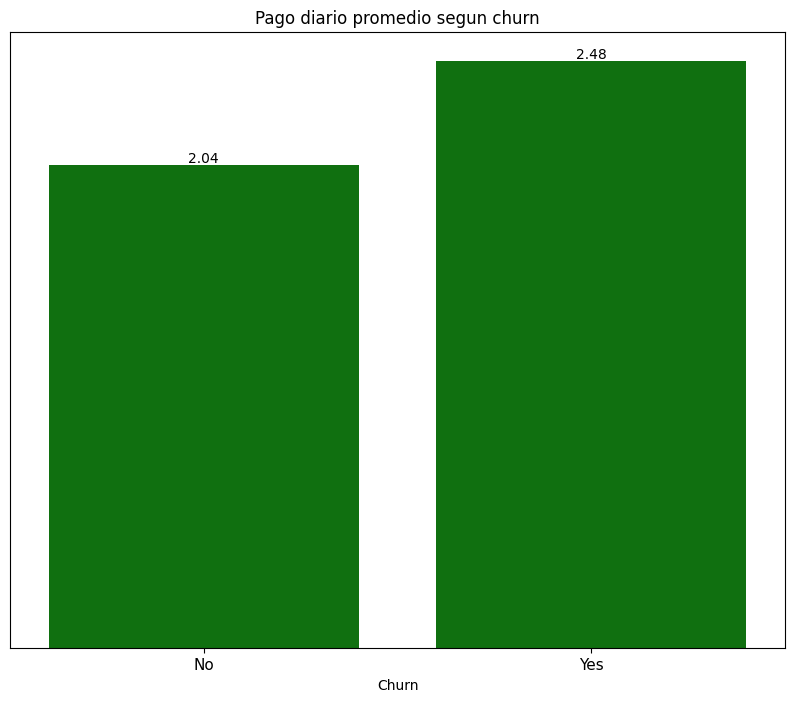

In [27]:
df_pagodiario = df_norm_limpio.groupby('Churn')['Cuentas_Diarias'].mean().reset_index()
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,8))
ax=sns.barplot(x='Churn',y='Cuentas_Diarias', data=df_pagodiario, color="green",ax=ax)
ax.set_title("Pago diario promedio segun churn")
ax.yaxis.set_visible(False)
ax.tick_params(axis='x', labelsize=11)
for p in ax.patches:
    height = p.get_height()  
    ax.text(p.get_x() + p.get_width()/2, height, 
    f'{height:.2f}', ha='center', va='bottom')
plt.savefig("pagodiario.png")  # Guarda el gráfico como imagen
plt.show()

In [22]:
columnas_numericas= list(columnas_numericas)
columnas_numericas.remove('SeniorCitizen')
columnas_numericas.append('Churn')


In [23]:
df_correlaciones = df_norm_limpio[columnas_numericas]
df_correlaciones['Churn'] = df_correlaciones['Churn'].replace({'Yes':1,'No':0})
correlaciones=df_correlaciones.corr()
correlaciones

C:\Users\Marcelo\AppData\Local\Temp\ipykernel_19188\440035964.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_correlaciones['Churn'] = df_correlaciones['Churn'].replace({'Yes':1,'No':0})
C:\Users\Marcelo\AppData\Local\Temp\ipykernel_19188\440035964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_correlaciones['Churn'] = df_correlaciones['Churn'].replace({'Yes':1,'No':0})


,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias,Churn
tenure,1.000000,0.247900,0.826178,0.247900,-0.352229
Charges.Monthly,0.247900,1.000000,0.651174,1.000000,0.193356
Charges.Total,0.826178,0.651174,1.000000,0.651174,-0.198324
Cuentas_Diarias,0.247900,1.000000,0.651174,1.000000,0.193356
Churn,-0.352229,0.193356,-0.198324,0.193356,1.000000


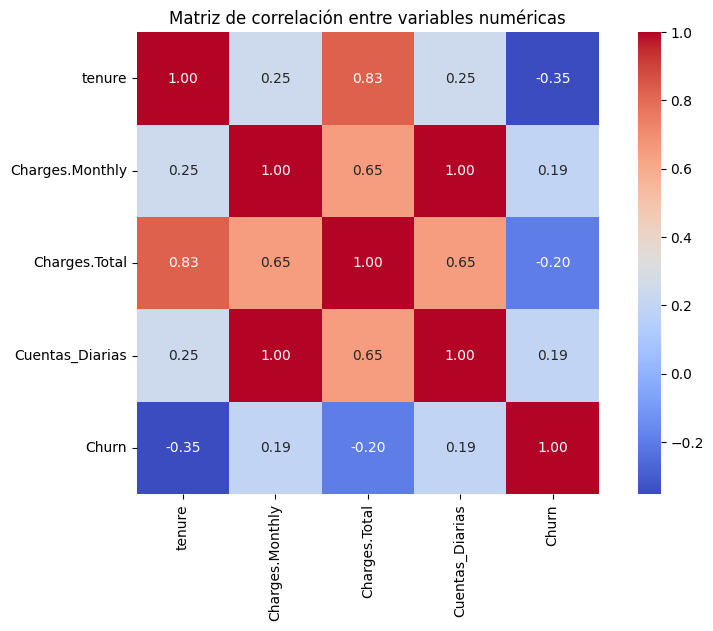

In [30]:
fig,ax = plt.subplots(figsize=(10,6))
ax= sns.heatmap(correlaciones,annot=True,fmt=".2f", cmap="coolwarm", square=True)
ax.set_title("Matriz de correlación entre variables numéricas")
plt.savefig("correlacion.png")  # Guarda el gráfico como imagen
plt.show()

C:\Users\Marcelo\AppData\Local\Temp\ipykernel_19188\3742855345.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_aux['Churn'] = df_aux['Churn'].replace({'Yes': 1, 'No': 0})


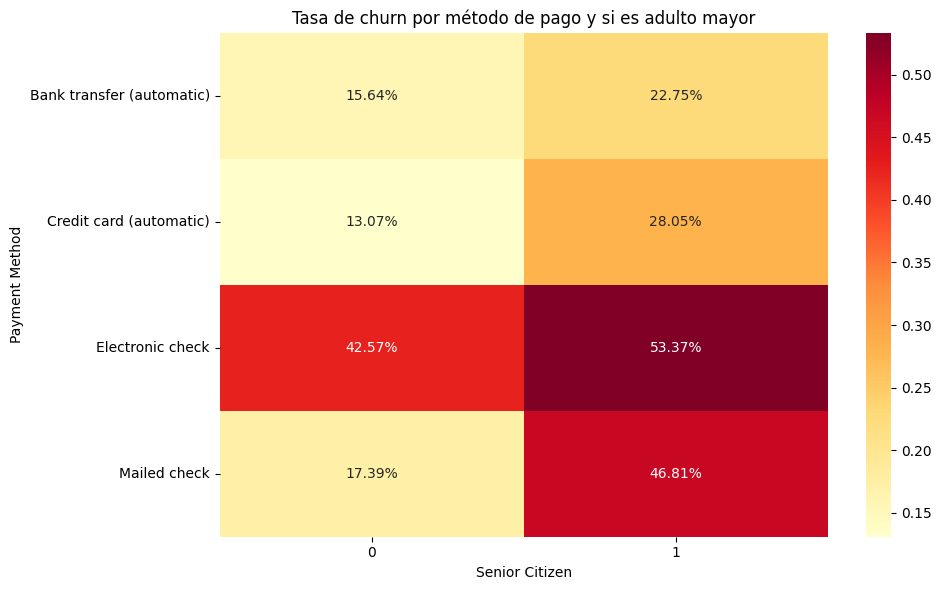

In [33]:
# Asegúrate que Churn esté como 0 (No) y 1 (Yes)
df_aux = df_norm_limpio.copy()
df_aux['Churn'] = df_aux['Churn'].replace({'Yes': 1, 'No': 0})

# Agrupar por dos variables y calcular tasa de churn
tabla = df_aux.groupby(['PaymentMethod', 'SeniorCitizen'])['Churn'].mean().unstack()

# Crear heatmap
plt.figure(figsize=(10,6))
sns.heatmap(tabla, annot=True, fmt=".2%", cmap='YlOrRd')
plt.title("Tasa de churn por método de pago y si es adulto mayor")
plt.xlabel("Senior Citizen")
plt.ylabel("Payment Method")
plt.tight_layout()
plt.savefig("correlacion_2.png")  # Guarda el gráfico como imagen
plt.show()


INFORME FINAL

Introduccion:

Se procedió a realizar el análisis de las razones de la evasión o pérdida de clientes, para ello analizamos variables como tiempo con el servicio, pago mensual, pago total, entre otros con la intención de encontrar insights que nos ayuden a tomar decisiones búsqueda de la retención del cliente.


Limpieza y Transformación de datos:

Lo primero que se hizo fue normalizar las columnas customer, phone, internet, account para obtener toda la información de los diccionarios anidados.
El siguiente paso fue ver la estructura de nuestro dataset a través del método info. Aquí se puede ver que no hya valores nulos, sin embargo cuando se realizó un value_counts en la columna Churn se observó que habian valores con un espacio, exactamente 224 registros, estos fueron eliminados para facilitar el análisis, además no representa un volumen alto para que pueda afectar las conclusiones que se puedan lograr. 
Aquí también vimos que la columna Charges.Total estaba definida como object cuando debió ser float, esto pasó porque también tenía espacios en blanco, se procedío a cambiar estos espacios en blanco por 0, ya que estos casos se daban porque era su primer mes en el servicio y aún no pagaba.
Por ultimo, se creó la columna Cuentas_Diarias que está basada en la columna Charges.Monthly pero dividida entre 30.


Análisis exploratorio de datos:

Se analizó el churn:

![Churn](churn.png)

y tambien se analizó según ciertas variables categóricas y continuas:

Categoricas:

![Gender](gender.png)

![Payment Method](PaymentMethod.png)

![Senior Citizen](SeniorCitizen.png)

![Contract](Contract.png)

Continuas:

![Pago Mensual](pagomensual.png)

![Pago Total](pagototal.png)

![Pago Diario](pagodiario.png)

![Correlación](correlacion.png)

![Correlación Método de pago y Edad](correlacion_2.png)

Con este análisis se observa que hay una alta evasión de clientes entre los usuarios que usan como método de pago el electronic check, algo similar pasa entre los clientes que son Senior Citizen, ya que la mayoría de ellos terminan dejando el servicio. Por el lado del tipo de contrato, como ya lo esperábamos, dejan el servicio mucho más los que tienen un contrato mes a mes.
Por el lado de las variables continuas tenemos que los clientes que dejan el servicio tienen un pago diario y mensual mayor a los que se mantienen.


Conclusiones:

Se debe identificar la razón de la salida de las personas que pagan con electronic check, esto es ajeno al servicio e impacta directamente, quizás es un problema en la pasarela de pagos o el proceso es muy tedioso. Informar que hay otras maneras de pago también puede servir.
Realizar camapañas enfocadas en personas mayores, quizás la plataforma no es amigable para ellos y por lo tanto se retiran del servicio, esto puede estar relacionado incluso con la problemática con electronic check.
Promover convenios o promociones  que generen más contrataciones por periodos más largos y evitar que contraten mes a mes, siempre será más sencillo dejar un servicio que se renueva muy seguido.
Buscar descuentos en los primeros meses puede ayudar a que más personas conserven el servicio.

Recomendaciones:

Debe buscar una estrategia de ventas y marketing orientada a conservar al cliente, sobre todo enfocándose en acciones de alto impacto y bajo presupuesto como lo es revisar los métodos de pago, capacitaciones a personas mayores, generar convenios o facildades de pago para evitar la contratación mes a mes. Lo último, pero aún viable son los descuentos, esto funcionaría totalmente quizás para enganchar al cliente en los primeros meses y fidelizarlo, luego buscaríamos más rentabilidad a lo largo del tiempo.
